<a href="https://colab.research.google.com/github/biruk50/JobSync-Parser/blob/main/Eth_job_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1 is required:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes, to plot pretty figures:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

download the csv file from kaggle  https://www.kaggle.com/datasets/birukworku100/afriwork-job-listing2021-2023

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

job=pd.read_csv("afriwork.csv")


In [48]:
# keep the first occurrence and remove subsequent duplicates
job.drop_duplicates(subset=['Job_title', 'description'], keep='first', inplace=True)


In [51]:
# prompt: Using dataframe job: fill the empty deadline column with ID less than 12530 with the year 2021, ID greater than 12530 and less than 29880 with year 2022, empty deadline greater than 29880 with 2023

def fill_deadline(row):
    # Extract the current year, month, and day from the Deadline column
    if pd.isna(row['Deadline']):
        year, month, day = '0000', '01', '01'  # Default values if Deadline is NaN,since we only want the year, we will set the value of month and day to 1(Even though that is not true)
    else:
        parts = row['Deadline'].split('-')
        year, month, day = parts[0], parts[1], parts[2]

    # Update the year based on the ID condition
    if row['ID'] < 12530:
        year = '2021'
    elif row['ID'] < 29880:
        year = '2022'
    else:
        year = '2023'

    # Reconstruct the Deadline string with the new year
    processed = year + "-" + month + "-" + day
    return processed

job['Deadline'] = job.apply(fill_deadline, axis=1)



In [53]:
job.head()

,ID,Job_title,Job_type,sector,location,Experience_level,Vacancies,Salary_Compensation,Deadline,description
0,1,ሰዐሊ,Hourly,NaN,NaN,NaN,NaN,NaN,2021-01-01,የቀለም ስዕል በደንብ መሳል የሚችል ደም ግባት ማምጣት የሚችል ፣ የ ኦ...
1,2,Graphic Design,Permanent,NaN,NaN,NaN,NaN,NaN,2021-01-01,"A Graphic Designer who are creative, elegant ..."
2,3,English Teachers for Elementary and Middle class,Permanent,NaN,NaN,NaN,NaN,NaN,2021-01-01,Must be graduate or post graduate with Englis...
3,4,Professional Python Developer,Contractual,NaN,NaN,NaN,NaN,NaN,2021-01-01,We are starting a new company and we need 2 p...
4,5,Sales Agents,Part-Time,NaN,NaN,NaN,NaN,NaN,2021-01-01,"We are looking for young, sociable, energetic..."


In [52]:
job['Deadline'] = pd.to_datetime(job['Deadline'], errors='coerce', format='%Y-%m-%d')


In [37]:
job.head()

,ID,Job_title,Job_type,sector,location,Experience_level,Vacancies,Salary_Compensation,Deadline
0,1,ሰዐሊ,Hourly,NaN,NaN,NaN,NaN,NaN,2021-01-01
1,2,Graphic Design,Permanent,NaN,NaN,NaN,NaN,NaN,2021-01-01
2,3,English Teachers for Elementary and Middle class,Permanent,NaN,NaN,NaN,NaN,NaN,2021-01-01
3,4,Professional Python Developer,Contractual,NaN,NaN,NaN,NaN,NaN,2021-01-01
4,5,Sales Agents,Part-Time,NaN,NaN,NaN,NaN,NaN,2021-01-01


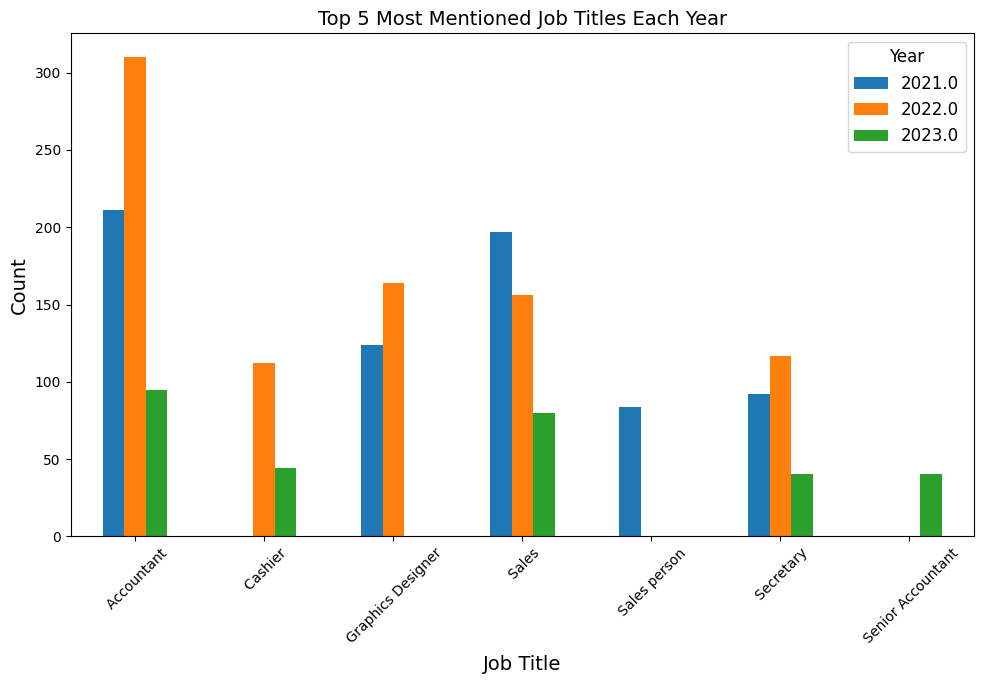

In [72]:
# Create a new column for year
job['year'] = pd.to_datetime(job['Deadline']).dt.year

# Get the top 5 most mentioned job titles in each year
top_5_job_titles = (
    job.groupby('year')['Job_title']
    .apply(lambda x: x.value_counts().head(5))
    .reset_index()
    .rename(columns={'Job_title': 'count'})
)

pivot_data = top_5_job_titles.pivot(index='level_1', columns='year', values='count').fillna(0)

# Plot the bar graph
pivot_data.plot(kind='bar', figsize=(10, 7))

# Set the labels and title
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 5 Most Mentioned Job Titles Each Year')
plt.xticks(rotation=45)
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

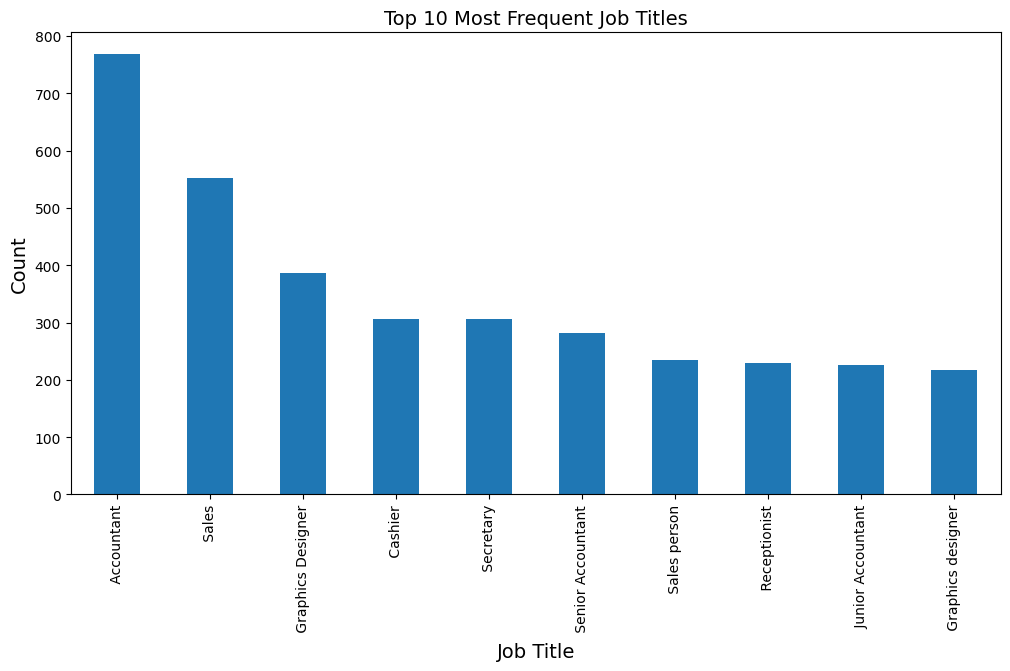

In [68]:

# Get the top 10 most frequent job titles
top_10_jobs = job['Job_title'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_jobs.plot(kind='bar')
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Number of Jobs')

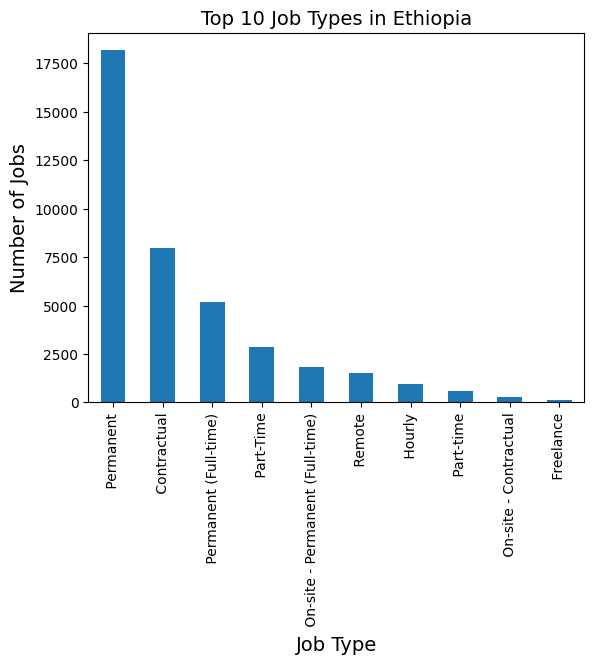

In [66]:

# Count the number of jobs for each job type
job_type_counts = job["Job_type"].value_counts().head(10)

# Create a bar chart of the top 10 job types
job_type_counts.plot(kind="bar")

# Add a title and labels to the chart
plt.title("Top 10 Job Types in Ethiopia")
plt.xlabel("Job Type")
plt.ylabel("Number of Jobs")


In [ ]:
# prompt: Using dataframe job: create a bar graph for the top 5 locations

job_location = job.groupby('location').size().sort_values(ascending=False).head(5).reset_index(name='count')
job_location.plot.bar(x='location', y='count')


Text(0.5, 1.0, 'Number of tech Job Posts each year in Ethiopia')

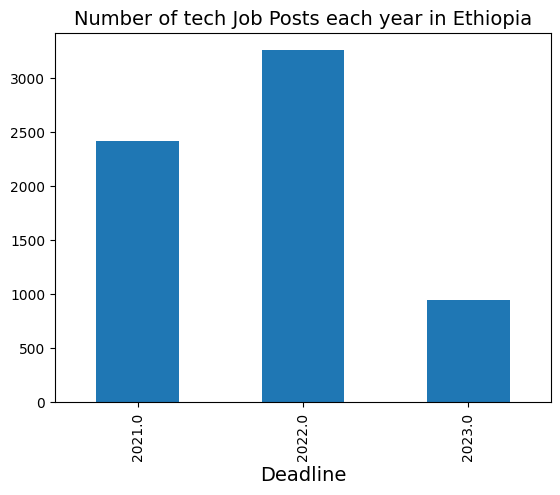

In [73]:
# prompt: Using dataframe job: select job titles that are tech related and show there change based on yearly change

# Search 'Job_title' and 'Sector' for tech-related jobs, case-insensitive
tech_jobs = job[job['Job_title'].str.contains('software|developer|programmer|data scientist|coder', case=False, regex=True) |
                job['sector'].str.contains('software|developer|programmer|data scientist|coder', case=False, regex=True)    |
                job['description'].str.contains('software|developer|programmer|data scientist|coder', case=False, regex=True) ]

# Group by year and calculate the percentage change
yearly_change = tech_jobs.groupby(tech_jobs['Deadline'].dt.year)['ID'].count()

# Plot the yearly change as a bar chart
yearly_change.plot(kind='bar')
plt.title("Number of tech Job Posts each year in Ethiopia")

In [ ]:
# @title Experience_level

from matplotlib import pyplot as plt
import seaborn as sns
job.groupby('Experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

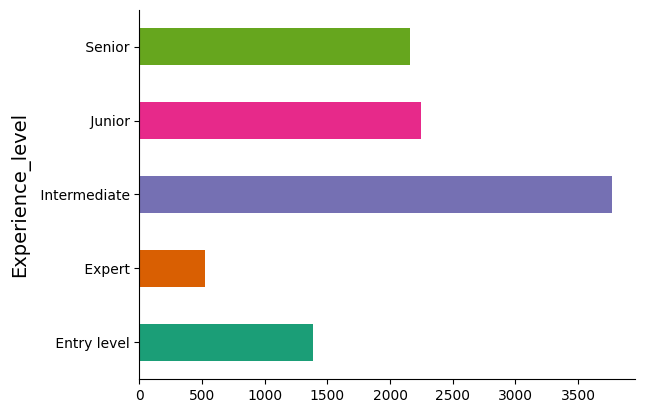

In [11]:
# @title Experience_level

from matplotlib import pyplot as plt
import seaborn as sns
job.groupby('Experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)